In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

In [40]:
dataset_MH = pd.read_csv("abcnews-date-text.csv")
#dataset_MH.head(10)

dataset_date = dataset_MH["publish_date"]
dataset_headline = dataset_MH["headline_text"]

print(dataset_date.head())
print(dataset_headline.head())

0    20030219
1    20030219
2    20030219
3    20030219
4    20030219
Name: publish_date, dtype: int64
0    aba decides against community broadcasting lic...
1       act fire witnesses must be aware of defamation
2       a g calls for infrastructure protection summit
3             air nz staff in aust strike for pay rise
4        air nz strike to affect australian travellers
Name: headline_text, dtype: object


In [41]:
# Define helper functions 
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

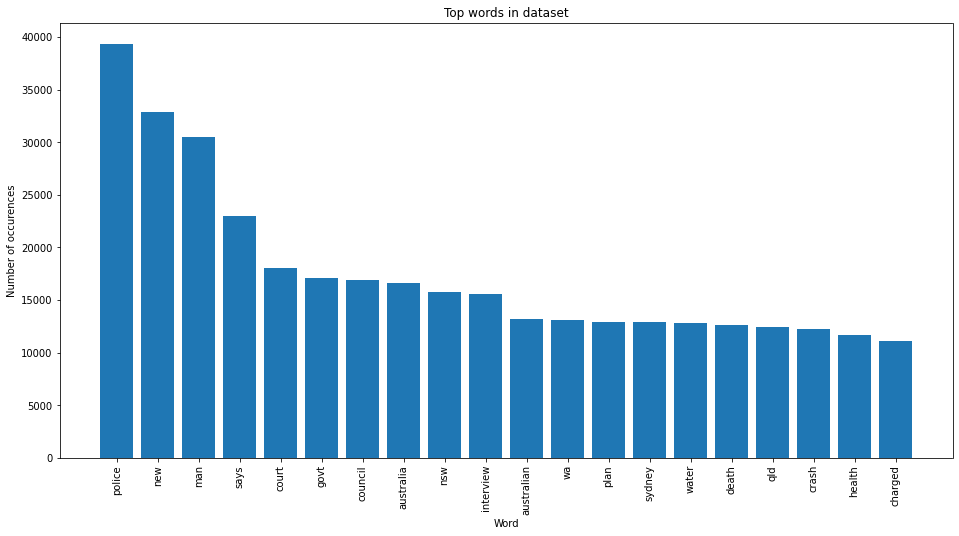

In [42]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=20,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=dataset_headline)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in dataset')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [43]:
import markovify
import random

In [48]:
dataset_headline[random.sample(range(100),20)]

NameError: name 'random' is not defined